In [1]:
# Import required modules
import glob
import scipy.io as sio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import sklearn
import analysisFunctions as af

from scipy.stats import zscore

In [2]:
# Read in and store the framewise displacement (fd) for the given dataset in a variable called fdAvgs,
# and create the TS_path_names and indices2Keep variables

# Store the fdAvgs and set a threshold fd
filePath = '/Users/AV/Dropbox/COBRE/movementData/fdAvgs_COBRE.txt'
fdAvgs = pd.read_csv(filePath,header=None);
threshold_fd = 0.5

# Store the path of the folder containing the subject data for the given dataset
subPath = '/Users/AV/Dropbox/COBRE/cfgData/'

# Need to alphabetise and store the subject file names into a variable
TS_path_names = sorted(glob.glob(subPath + '*.mat'))

# Filter the subjects based on their fd, and retain the subjects that have an fd < threshold_fd
TS_path_names, indices2Keep = af.removePathNames(filePath, threshold_fd, TS_path_names)
indices2Keep = indices2Keep.tolist()

# Adding 1 to every element in the array to convert to MATLAB indexing
indices2KeepMat = list(np.asarray(indices2Keep) + 1)

print(indices2KeepMat)

[1, 3, 4, 5, 7, 9, 11, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 74, 75, 76, 77, 79, 80, 81, 83, 84, 85, 87, 88, 89, 90, 91, 92, 94, 96, 97, 98, 99, 100, 101, 102, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145]


In [3]:
# Add a multi-level index to the tsData and store some key variables

element = 'element3_COBRE.txt' # Read in the feature matrix data from the saved .txt file
PyFeatList = 'PythonFeatureList.txt' # This text file contains the 22 feature names

# Add a multi-level index to the feature matrix and save into the variable, tsData
# Also store the number of ROIs and subjects in the data
tsData, ROIs, subjects, feats, featList = af.addIndices(element,subPath,PyFeatList)

In [4]:
# Select a given feature from the dataframe
''' This function should take the tsData, feature name and the indices to be kept (based on the threshold fd) and
    return the selected featSlice as a dataframe '''

# Choose which feature to analyse
feature = 1

featureName = featList[feature-1]

featSlice = af.getFeatSlice(ROIs,subjects,tsData,featureName,indices2KeepMat)

featSlice

,1,2,3,4,5,6
Subject,,,,,,
1,0.457800,0.350779,0.394352,0.271796,0.307887,0.404747
3,0.296190,0.379995,0.240158,0.271738,0.327688,0.267030
4,0.311406,0.264487,0.335677,0.341385,0.226248,0.352568
5,0.262636,0.217854,0.323906,0.321348,0.356564,0.253703
7,0.270272,0.359857,0.252303,0.266756,0.285839,0.238176
9,0.397770,0.416895,0.444711,0.340054,0.364354,0.396237
11,0.419186,0.331290,0.403195,0.259373,0.208169,0.285637
13,0.352464,0.322560,0.344763,0.325608,0.308297,0.342277
14,0.355643,0.438771,0.247960,0.464635,0.371593,0.378213


In [5]:
# Select a given ROI from the dataframe - Replaces the analysis function 'getROISlice'
''' Take the tsData, ROI and the indices to be kept (based on the threshold fd) and
    return the selected ROISlice as a dataframe '''

ROI = 1 # Select the first ROI

ROISlice = tsData.loc[ROI,indices2KeepMat,:]

ROISlice

# ROISlice.loc[:,featList[:2]] # Sub-selection

CO_Embed2_Dist_tau_d_expfit_meandiff  CO_FirstMin_ac  \
ROI Subject                                                         
1   1                                    0.457800             7.0   
    3                                    0.296190             4.0   
    4                                    0.311406             4.0   
    5                                    0.262636             5.0   
    7                                    0.270272             5.0   
    9                                    0.397770             5.0   
    11                                   0.419186             6.0   
    13                                   0.352464             5.0   
    14                                   0.355643             4.0   
    15                                   0.303351             5.0   
    16                                   0.337234             6.0   
    18                                   0.349650             5.0   
    19                                   0.317007             4.0   
    20                                   0.313834             5.0   
    21                                   0.359140             5.0   
    22                                   0.248041             4.0   
    23                                   0.398858             8.0   
    24                                   0.233334             4.0   
    26                                   0.223251             4.0   
    27                                   0.412838             5.0   
    28                                   0.418357             5.0   
    29                                   0.306094             5.0   
    30                                   0.376584             5.0   
    32                                   0.327465             5.0   
    33                                   0.294159             4.0   
    34                                   0.342686             5.0   
    35                                   0.210127             4.0   
    36                                   0.376942             5.0   
    37                                   0.543496            11.0   
    38                                   0.404091             6.0   
...                                           ...             ...   
    115                                  0.248586             5.0   
    116                                  0.345202             5.0   
    117                                  0.204727             4.0   
    118                                  0.327231             4.0   
    119                                  0.350011             5.0   
    120                                  0.492564             5.0   
    121                                  0.511177             6.0   
    122                                  0.283896             4.0   
    123                                  0.408979             5.0   
    124                                  0.293188             5.0   
    125                                  0.315736             5.0   
    126                                  0.284047             5.0   
    127                                  0.342785             5.0   
    128                                  0.313667             6.0   
    129                                  0.377943             6.0   
    130                                  0.354007             5.0   
    131                                  0.350920             5.0   
    132                                  0.380634             5.0   
    133                                  0.361564             5.0   
    135                                  0.245030             4.0   
    136                                  0.325777             5.0   
    137                                  0.354498             5.0   
    138                                  0.472500            11.0   
    139                                  0.310770             4.0   
    140                                  0.359967             5.0   
    141    

In [6]:
# Create the target column - unique for each dataset

# Select which dataset is being used
dataset = 'COBRE'

if dataset == 'UCLA':

    # Creating the target column
    targetCol = af.getTargetCol(TS_path_names)

elif dataset == 'COBRE':

    # Creating the target column
    csvPath = '/Users/AV/Dropbox/COBRE/participants.csv'
    COBRE = pd.read_csv(csvPath,header=None);

    targetCol = COBRE.iloc[1:,2]
    targetCol = targetCol.tolist()
    targetCol = pd.DataFrame(data=targetCol, columns=['target'])
    
    targetCol = targetCol.iloc[indices2Keep,:]
    targetCol = np.asarray(targetCol,dtype=np.int)

    # A '0' indicates a control subject and a '1' indicates a subject with SCZ
    targetColModified = np.where(targetCol==1, 0, targetCol) # First change the pre-existing 1s to 0s
    targetCol = np.where(targetCol==2, 1, targetColModified) # Then change the 2s to 1s

In [7]:
# Store and print the subject numbers within the dataset

Control, SCZ, Total, SCZ2Ctrl = af.giveMeSubjectNums(targetCol)

print('Control = ' + str(Control))
print('SCZ = ' + str(SCZ))
print('Total = ' + str(Total))
print('SCZ : Control = ' + str(SCZ2Ctrl) + ' : 1')

Control = 69
SCZ = 55
Total = 124
SCZ : Control = 0.80 : 1


In [8]:
# Assign the data to variables
DataSlice = ROISlice # featSlice or ROISlice
DataSlice_zscored = DataSlice.apply(zscore)

X = DataSlice_zscored
y = np.ravel(targetCol)

X

CO_Embed2_Dist_tau_d_expfit_meandiff  CO_FirstMin_ac  \
ROI Subject                                                         
1   1                                    1.688437        1.149305   
    3                                   -0.748659       -0.839260   
    4                                   -0.519199       -0.839260   
    5                                   -1.254659       -0.176405   
    7                                   -1.139516       -0.176405   
    9                                    0.783183       -0.176405   
    11                                   1.106130        0.486450   
    13                                   0.099952       -0.176405   
    14                                   0.147899       -0.839260   
    15                                  -0.640670       -0.176405   
    16                                  -0.129709        0.486450   
    18                                   0.057516       -0.176405   
    19                                  -0.434742       -0.839260   
    20                                  -0.482582       -0.176405   
    21                                   0.200632       -0.176405   
    22                                  -1.474762       -0.839260   
    23                                   0.799591        1.812161   
    24                                  -1.696546       -0.839260   
    26                                  -1.848589       -0.839260   
    27                                   1.010405       -0.176405   
    28                                   1.093636       -0.176405   
    29                                  -0.599311       -0.176405   
    30                                   0.463685       -0.176405   
    32                                  -0.277027       -0.176405   
    33                                  -0.779287       -0.839260   
    34                                  -0.047495       -0.176405   
    35                                  -2.046504       -0.839260   
    36                                   0.469093       -0.176405   
    37                                   2.980747        3.800726   
    38                                   0.878494        0.486450   
...                                           ...             ...   
    115                                 -1.466543       -0.176405   
    116                                 -0.009557       -0.176405   
    117                                 -2.127932       -0.839260   
    118                                 -0.280554       -0.839260   
    119                                  0.062958       -0.176405   
    120                                  2.212687       -0.176405   
    121                                  2.493377        0.486450   
    122                                 -0.934052       -0.839260   
    123                                  0.952215       -0.176405   
    124                                 -0.793933       -0.176405   
    125                                 -0.453912       -0.176405   
    126                                 -0.931774       -0.176405   
    127                                 -0.046007       -0.176405   
    128                                 -0.485110        0.486450   
    129                                  0.484182        0.486450   
    130                                  0.123227       -0.176405   
    131                                  0.076669       -0.176405   
    132                                  0.524765       -0.176405   
    133                                  0.237192       -0.176405   
    135                                 -1.520164       -0.839260   
    136                                 -0.302492       -0.176405   
    137                                  0.130624       -0.176405   
    138                                  1.910118        3.800726   
    139                                 -0.528799       -0.839260   
    140                                  0.213109       -0.176405   
    141    

In [9]:
# Perform 10-fold CV

def get10FoldCVScore(X,y):
    ''' This function returns a 10-fold CV score after balancing the classes '''

    # Import the support vector classifier and balance the classes
    from sklearn.svm import SVC
    svclassifier = SVC(kernel='linear')

    # Split the data into training and test sets
    from sklearn.model_selection import StratifiedKFold
    skf = StratifiedKFold(n_splits=10)

    # Import accuracy score
    from sklearn.metrics import balanced_accuracy_score

    # Initialise a few variables
    scores = np.zeros(10)
    i = 0

    for train_index, test_index in skf.split(X,y):

        train_index = train_index.tolist()
        test_index = test_index.tolist()

        print("Train:", train_index)
        print('')
        print("Validation:",test_index)

        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y[train_index], y[test_index]

        svclassifier.fit(X_train, y_train)
        y_pred = svclassifier.predict(X_test)

        print('')
        print('y_test = ', y_test)
        print('')
        print('y_pred = ', y_pred)
        print('')

        scores[i] = '{0:.2f}'.format(balanced_accuracy_score(y_test, y_pred)*100)
        print('Acc % = ', scores[i])
        print('')

        # Increment index
        i += 1
    return scores

scores = get10FoldCVScore(X,y)

# Print scores
print('10-fold CV scores as a percentage: ' + str(scores))
print('')

# Mean 10-fold CV score with an error of 1 std dev
print("Accuracy as a percentage: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Train: [6, 7, 10, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123]

Validation: [0, 1, 2, 3, 4, 5, 8, 9, 11, 12, 13, 14, 17]

y_test =  [1 1 1 1 1 1 0 0 0 0 0 0 0]

y_pred =  [1 0 0 1 1 0 1 1 0 0 0 0 0]

Acc % =  60.71

Train: [0, 1, 2, 3, 4, 5, 8, 9, 11, 12, 13, 14, 17, 21, 22, 24, 26, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 

In [10]:
# Store the first five indices of the ROIs / features with the most significant p-values (the third output)

tpValDf, tpValDf_sorted, sigPValInds = af.getTPVals(targetCol, DataSlice)

tpValDf_sorted

,t-value,p-value
Feature / ROI,,
15,1.764284,0.160484
18,1.726410,0.173805
16,1.667268,0.196266
19,1.175066,0.484830
13,1.151235,0.503957
10,1.132111,0.519646
1,1.112364,0.536567
7,0.997610,0.641334
21,0.977782,0.660611


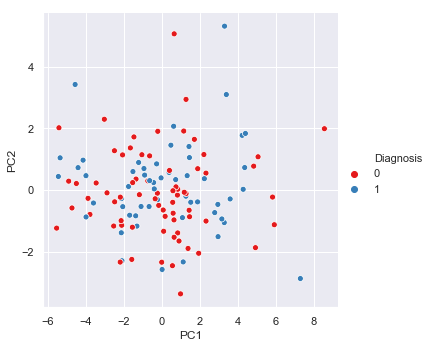

In [11]:
# Show me the PCA figure

af.showMePCAFig(DataSlice, targetCol)

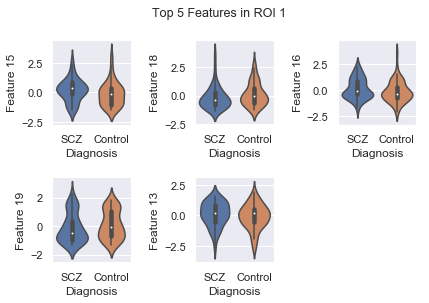

In [12]:
# Show me the top five features / ROIs as violin plots in the ROI / feature being analysed

af.showMeViolinPlts(targetCol, sigPValInds, DataSlice, 1, ROI) # When looking at ROISlices

# af.showMeViolinPlts(targetCol, sigPValInds, DataSlice, 0, feature) # When looking at featSlices

In [13]:
# Initialise a few boolean variables which decide what the outputs are

dispFigs = False
regAccOnly = False
featAccOnly = False
    
af.showMeROIAccPlot(ROIs, tsData, indices2KeepMat, targetCol, dispFigs)

('54.47', '14.66')

In [14]:
# Define a function, showMeFeatAccPlot
    
af.showMeFeatAccPlot(element, subPath, PyFeatList, indices2KeepMat, targetCol, dispFigs)

('51.29', '9.04')

In [15]:
# Region-by-Region Analysis

af.Reg_by_Reg_Anal(ROI, tsData, targetCol, ROIs, indices2KeepMat, regAccOnly, dispFigs)

('56.67', '15.37', '54.47', '14.66')

In [16]:
# Feature by Feature Analysis

af.Feat_by_Feat_Anal(feature, featureName, element, subPath, PyFeatList,
                     indices2KeepMat, targetCol, featAccOnly, dispFigs)

('52.07', '5.70', '51.29', '9.04')